0.9684019932001858


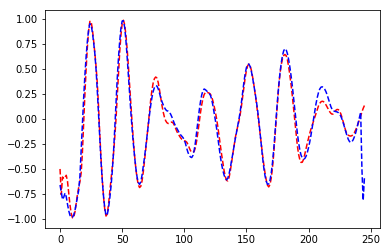

In [102]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import correlate
from scipy.stats.stats import pearsonr  
import cv2



def computeMirrorPearson(a_sig):

    #arr1 = np.array([0,1.7373,3.9961,5.5333,6.9294,8.4039,9.898,13.439,17.125,22.271,27.278,30.129,32.804,34.29,35.49,35.49,35.49,35.49,35.49,35.49,32.718,25.431,19.376,14.945,12.365,11.671,11.325,11.278,11.729,12.498,14.29,16.541,18.184,19.624,22.867,26.553,29.522,32.38,33.973,35.467,36.247,36.984,36.984,36.914,36.239,34.949,30.576,25.349,17.208,11.016,9.5843,9.1451,10.557,10.796,9.3294,10.278,13.937,18.365,23.463,25.996,26.749,26.576,25.902,25.129,24.314,23.027,21.604,20.106,18.608,15.867,12.988,11.42,9.9333,9.9529,9.9059,9.149,8.5059,8.5059,8.651,9.4078,9.9686,9.9686,9.9686,9.9686,9.9686,9.9686,9.6353,8.8824,9.2314,10.675,11.357,11.451,14.18,18.502,20.918,22.427,23.369,24.106,24.851,25.608,24.42,22.937,22.157,21.431,21.345,21.322,22.137,22.949,23.616,24.161,24.141,23.957,23.216,21.22,16.118,11.765,8.8196,6.502,5.1216,4.702,5.4,5.7255,5.7255,7.4118,10.263,14.655,19.863,22.427,23.91,25.957,28.157,29.078,29.753,29.761,29.698,26.275,22.718,19.071,15.502,12.522,10.149,11.647,12.827,12.725,13.235,15.494,18.949,24.886,28.051,26.58,25.71,25.576,25.141,24.38,22.059,18.533,16.216,14.655,15.663,17.855,20.102,22.357,23.949,25.392,26.224,26.976,28.365,29.827,30.6,31.196,28.22,25.322,23.157,20.643,16.294,12.596,11.098,9.7922,8.9294,8.8941,10.38,12.161,14.341,16.576,18.855,20.725,22.208,23.255,23.996,24.741,25.494,23.58,20.596,16.439,11.945,8.1804,4.5686,4.1843,4.1843,7.7412,11.475,14.388,17.251,19.384,21.341,22.133,23.059,24.518,24.835,21.878,18.941,16,13.608,12.125,11.937,13.412,14.902,16.392,19.125,22.827,24.251,24.251,24.71,25.384,25.553,25.553,26.765,28.282,27.835,27.075,23.549,19.824,14.78,9.9216,9.1059,8.0667,5.1725,2.5451,1.1098,0,0,0,0,0,0,0,0,0])
    #arr2=np.array([1, 2, 3,4])
   
    matrix_coef=[]
    for i in range(1,len(a_sig)+1):
    #for i in range(1,9):  
        win_sig=a_sig[:i]
        #print(c1)

        inv_sig=win_sig[::-1]
        #print(d1)
        #len(arr1)
        coef=pearsonr(win_sig,inv_sig)
        #we keep only e[0]
        #print(e1)
        matrix_coef = np.append(matrix_coef, coef[0])
    return matrix_coef




def alignSignals(a_sig,b_sig):

    x_a=len(a_sig)
    x_b=len(b_sig)
    x_max=max(x_a,x_b)
    x=np.arange(0, x_max, 1)
    #print(x_a-x_b)

    if x_a-x_b>0:
        for i in range(x_a-x_b):
            #print(i)
            #b_sig.append(0)
            b_sig=np.append(b_sig,0)
    if x_a-x_b<0:
        
        for i in range(x_b-x_a):
            #print(i)
            a_sig=np.append(a_sig,0)
            #e = np.append(e, e1[0])

    lag = np.argmax(correlate(a_sig, b_sig))
    #print('lag=',lag)
    c_sig = np.roll(b_sig, shift=int(np.ceil(lag)+1))

    for i in range(abs(len(c_sig)-lag)):
        #c_sig[i]=0
        z=0
        
        
    return a_sig , c_sig, x




def compareSignals(a_sig,b_sig):

    coefPa=computeMirrorPearson(a_sig)
    coefPb=computeMirrorPearson(b_sig)
    #print(coefPa)
    #print(coefPb)

    #print("=================")
 
    coefPa=coefPa[2:]
    coefPb=coefPb[2:]

    aCum_sig,cCum_sig,x= alignSignals(coefPa,coefPb) 
    
    coef=pearsonr(aCum_sig,cCum_sig)[0]
    #print(aCum_sig)
    #print(cCum_sig)   
    
     
    #print(coef)
    plt.figure()
    plt.plot(x,aCum_sig,'r--',x,cCum_sig,'b--')
    return coef
    

    
    
    
#a_sig=np.array([1,6,3,5,7,8,5,4,9,26,66])
#b_sig=np.array([1,6,3,4,7,9,7,4,11,22,66])    
    
    
#sim=compareSignals(a_sig,b_sig) 


    

newX=256
newY=64
file='test/0185.pdf300/1217-1486-120-38.png'
imgQ = cv2.imread(file,0);
imgQ = cv2.bitwise_not(imgQ)
imgQ = cv2.resize(imgQ,(int(newX),int(newY)))
imgQ=imgQ/255
y=imgQ.sum(axis=0)


count=0
for i in range(len(y)):
    if y[i]==0:
        count=count+1
    else:
        count=count-1
        break               
#print(y)               
#print(y[count:])

y=y[count:]

y = np.array([0,1.7373,3.9961,5.5333,6.9294,8.4039,9.898,13.439,17.125,22.271,27.278,30.129,32.804,34.29,35.49,35.49,35.49,35.49,35.49,35.49,32.718,25.431,19.376,14.945,12.365,11.671,11.325,11.278,11.729,12.498,14.29,16.541,18.184,19.624,22.867,26.553,29.522,32.38,33.973,35.467,36.247,36.984,36.984,36.914,36.239,34.949,30.576,25.349,17.208,11.016,9.5843,9.1451,10.557,10.796,9.3294,10.278,13.937,18.365,23.463,25.996,26.749,26.576,25.902,25.129,24.314,23.027,21.604,20.106,18.608,15.867,12.988,11.42,9.9333,9.9529,9.9059,9.149,8.5059,8.5059,8.651,9.4078,9.9686,9.9686,9.9686,9.9686,9.9686,9.9686,9.6353,8.8824,9.2314,10.675,11.357,11.451,14.18,18.502,20.918,22.427,23.369,24.106,24.851,25.608,24.42,22.937,22.157,21.431,21.345,21.322,22.137,22.949,23.616,24.161,24.141,23.957,23.216,21.22,16.118,11.765,8.8196,6.502,5.1216,4.702,5.4,5.7255,5.7255,7.4118,10.263,14.655,19.863,22.427,23.91,25.957,28.157,29.078,29.753,29.761,29.698,26.275,22.718,19.071,15.502,12.522,10.149,11.647,12.827,12.725,13.235,15.494,18.949,24.886,28.051,26.58,25.71,25.576,25.141,24.38,22.059,18.533,16.216,14.655,15.663,17.855,20.102,22.357,23.949,25.392,26.224,26.976,28.365,29.827,30.6,31.196,28.22,25.322,23.157,20.643,16.294,12.596,11.098,9.7922,8.9294,8.8941,10.38,12.161,14.341,16.576,18.855,20.725,22.208,23.255,23.996,24.741,25.494,23.58,20.596,16.439,11.945,8.1804,4.5686,4.1843,4.1843,7.7412,11.475,14.388,17.251,19.384,21.341,22.133,23.059,24.518,24.835,21.878,18.941,16,13.608,12.125,11.937,13.412,14.902,16.392,19.125,22.827,24.251,24.251,24.71,25.384,25.553,25.553,26.765,28.282,27.835,27.075,23.549,19.824,14.78,9.9216,9.1059,8.0667,5.1725,2.5451,1.1098,0,0,0,0,0,0,0,0,0])

#sim=compareSignals(y,y) 
#print(sim)
 
print("=============")
b = np.loadtxt('../R/numtest.txt',delimiter=',') 
#print( b)
#z=b[0,:]
#print(z)
num1=27
num2=29
sim=compareSignals(b[num1-1,:],b[num2-1,:]) 
print(sim)

In [ ]:

import matplotlib.pyplot as plt 
import numpy as np
import cv2
from scipy import interpolate

def createPadding(img, margin):
    w=img.shape[1]
    #print(w)
    for i in range(10):
        img = np.insert(img, w, values=255, axis=1)

    for i in range(10):
        img = np.insert(img, 0, values=255, axis=1)    
    
    h=img.shape[0]
    #print(w)
    for i in range(10):
        img = np.insert(img, h, values=255, axis=0)
    
    for i in range(10):
        img = np.insert(img, 0, values=255, axis=0)
    
    
    return img


def applyCircleErosion(word_img,r):
    word_img=createPadding(word_img, 20) 
    kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(r,r))
    erode_img = cv2.erode(word_img, kernel, iterations=1)
    return erode_img
def hHist(img):
    newX=256
    newY=32
    img = cv2.bitwise_not(img)
    img = cv2.resize(img,(int(newX),int(newY)))
    img=img/255
    y=img.sum(axis=0)
    ymax=max(y)
    y=y/ymax
    #index=np.where(y == 0)
    #print(index)
    #print(y.shape)
    num=np.size(img,1)
    x = np.arange(num)
    #print(x.shape)
    fig, ax = plt.subplots()
    ax.plot(x,y)
    plt.show()
    return y
    
def vHist(img):
    newX=256
    newY=32
    img = cv2.bitwise_not(img)
    img = cv2.resize(img,(int(newX),int(newY)))
    img=img/255
    y=img.sum(axis=1)
    ymax=max(y)
    y=y/ymax
    
    print(max(y))
    
    
    
    #index=np.where(y == 0)
    #print(index)
    #print(y.shape)
    num=np.size(img,0)
    x = np.arange(num)
    #print(x.shape)
    fig, ax = plt.subplots()
    ax.plot(x,y)
    plt.show()
    return y

#img2 = cv2.imread("word/pisteos.png",0);
#yv=vHist(img2)
#img2 = cv2.imread("word/pneuma.png",0);


#file='tmp1/idiop.png'
#img2 = cv2.imread(file,0);
#plt.figure()
#plt.imshow(img2,cmap="gray")
#yv=hHist(img2)

count=0
files = [line.rstrip() for line in open("word/pneuma.png.txt", 'r')]

for file in files:
    print(file)
    count=count+1
    if count >9:
        continue
    
    img2 = cv2.imread(file,0);
    plt.figure()
    plt.imshow(img2,cmap="gray")
    yv=hHist(img2)



In [8]:
import numpy as np

import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr

rpy2.robjects.numpy2ri.activate()

# Set up our R namespaces
R = rpy2.robjects.r
DTW = importr('dtw')

# Generate our data
idx = np.linspace(0, 2*np.pi, 100)
template = np.cos(idx)
query = np.sin(idx) + np.array(R.runif(100))/10
#query=np.cos(idx)+ np.array(R.runif(100))/10



# Calculate the alignment vector and corresponding distance
alignment = R.dtw(query, template, keep=True)
dist = alignment.rx('distance')[0][0]

print(dist)

3.8905237557895904


In [ ]:
import numpy as np
from scipy.stats.stats import pearsonr   
import cv2
import matplotlib.pyplot as plt 
def computeSelfPearson(arr1):

    #arr1 = np.array([0,1.7373,3.9961,5.5333,6.9294,8.4039,9.898,13.439,17.125,22.271,27.278,30.129,32.804,34.29,35.49,35.49,35.49,35.49,35.49,35.49,32.718,25.431,19.376,14.945,12.365,11.671,11.325,11.278,11.729,12.498,14.29,16.541,18.184,19.624,22.867,26.553,29.522,32.38,33.973,35.467,36.247,36.984,36.984,36.914,36.239,34.949,30.576,25.349,17.208,11.016,9.5843,9.1451,10.557,10.796,9.3294,10.278,13.937,18.365,23.463,25.996,26.749,26.576,25.902,25.129,24.314,23.027,21.604,20.106,18.608,15.867,12.988,11.42,9.9333,9.9529,9.9059,9.149,8.5059,8.5059,8.651,9.4078,9.9686,9.9686,9.9686,9.9686,9.9686,9.9686,9.6353,8.8824,9.2314,10.675,11.357,11.451,14.18,18.502,20.918,22.427,23.369,24.106,24.851,25.608,24.42,22.937,22.157,21.431,21.345,21.322,22.137,22.949,23.616,24.161,24.141,23.957,23.216,21.22,16.118,11.765,8.8196,6.502,5.1216,4.702,5.4,5.7255,5.7255,7.4118,10.263,14.655,19.863,22.427,23.91,25.957,28.157,29.078,29.753,29.761,29.698,26.275,22.718,19.071,15.502,12.522,10.149,11.647,12.827,12.725,13.235,15.494,18.949,24.886,28.051,26.58,25.71,25.576,25.141,24.38,22.059,18.533,16.216,14.655,15.663,17.855,20.102,22.357,23.949,25.392,26.224,26.976,28.365,29.827,30.6,31.196,28.22,25.322,23.157,20.643,16.294,12.596,11.098,9.7922,8.9294,8.8941,10.38,12.161,14.341,16.576,18.855,20.725,22.208,23.255,23.996,24.741,25.494,23.58,20.596,16.439,11.945,8.1804,4.5686,4.1843,4.1843,7.7412,11.475,14.388,17.251,19.384,21.341,22.133,23.059,24.518,24.835,21.878,18.941,16,13.608,12.125,11.937,13.412,14.902,16.392,19.125,22.827,24.251,24.251,24.71,25.384,25.553,25.553,26.765,28.282,27.835,27.075,23.549,19.824,14.78,9.9216,9.1059,8.0667,5.1725,2.5451,1.1098,0,0,0,0,0,0,0,0,0])
    #arr2=np.array([1, 2, 3,4])
    
    c=0
    for i in range(arr1.shape[0]):
        #print(y[i])
        if arr1[i]==0:
            c=c+1
        else:
            arr1=arr1[c:]
            break
    
    
    
    
    
    e=[]
    for i in range(1,len(arr1)+1):
    #for i in range(1,9):  
        c1=arr1[:i]
        #print(c1)

        d1=c1[::-1]
        #print(d1)
        #len(arr1)
        e1=pearsonr(c1,d1)
        #we keep only e[0]
        #print(e1)
        e = np.append(e, e1[0])
    return e

#@@@@@@@@@@@@@@@@@@@@@@@@@@
newX=256
newY=64




file="word/pneuma.png"
file='test/0185.pdf300/308-1122-132-35.png'
file='test/0185.pdf300/1217-1486-120-38.png'
imgQ = cv2.imread(file,0);
imgQ = cv2.bitwise_not(imgQ)
imgQ = cv2.resize(imgQ,(int(newX),int(newY)))
imgQ=imgQ/255
y=imgQ.sum(axis=0)



 
        
        
        
        
        
#print(y.shape[0])
#print(y)
    #print(computePearson(y[8:]))
#print(y)
corQ=computeSelfPearson(y)
corQ = corQ[~np.isnan(corQ)]

#print(corQ)




#@@@@@@@@@@@@@@@@@@@@@@@@@@


 

files = [line.rstrip() for line in open("word/pneuma.png.txt", 'r')]
count=0
arrTS=[]
for file in files:
    #print(file)
    #xx=0
    count=count+1
    if count>18:
        continue
    img = cv2.imread(file,0);
    
    img = cv2.bitwise_not(img)
    img = cv2.resize(img,(int(newX),int(newY)))
    img=img/255
    y=img.sum(axis=0)
    
    
    print(y.shape[0])
    #print(y[8:])
    #print(computePearson(y[8:]))
    cor=computePearson(y)
    cor = cor[~np.isnan(cor)]
    
    #print(cor)
   
    #print(pearsonr(cor[:240],corQ[:240])[0])

    plt.figure()
    plt.xlabel(pearsonr(cor[:240],corQ[:240])[0])
    plt.imshow(img,cmap="gray")










    
    
    
    
    
#print(e)
#print(len(e))
   
#a = [1,4,6]
#b = [1,2,3] 
#import numpy
#np.corrcoef(a,b)
#pearsonr(a,b)

[ 0.         -0.3454915   1.11803399 -2.02254249  2.5        -2.02254249
  0.42705098  1.89057647 -4.04508497  5.         -4.04508497  1.89057647
  0.42705098 -2.02254249  2.5        -2.02254249  1.11803399 -0.3454915
  0.        ]
9


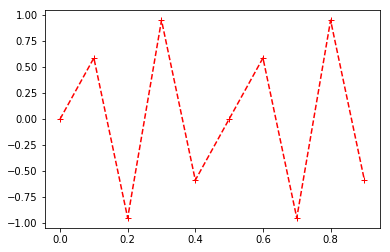

In [42]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import correlate
a_sig=[0,0,1,2,3]
b_sig=[1,6,3]

dt = 0.1

t_steps = np.arange(0, 1, dt)
a_sig = np.sin(2*np.pi*t_steps*4+0)+0.*np.random.random_sample()
b_sig = np.sin(2*np.pi*t_steps*4)
lag = np.argmax(correlate(a_sig, b_sig))
print(correlate(a_sig, b_sig))
print(lag)
c_sig = np.roll(b_sig, shift=int(np.ceil(lag)))
#print(c_sig)

plt.plot(t_steps,a_sig,'r--',t_steps,b_sig,'r+')
#plt.plot(a_sig)
#plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
#plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
#plt.axis([0, 6, 0, 20])
plt.show()